In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io

In [3]:
oxy_data=scipy.io.loadmat('oxy_ts_s6_dcwm_nofilt.mat')

In [4]:
ts_rest=oxy_data['ts_rest']
ts_rest.shape

(26, 9, 748)

In [6]:
time_series=ts_rest[0,1]
print(len(time_series))

748


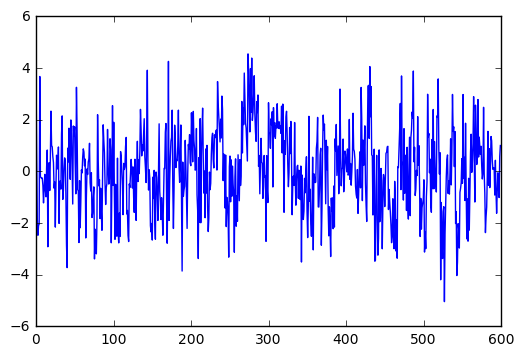

In [7]:
time_ts=np.arange(len(time_series))*0.802
plt.plot(time_ts,time_series)

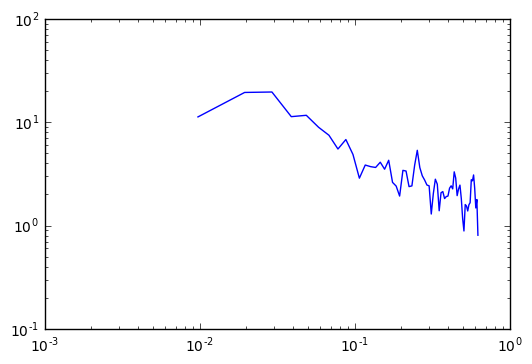

In [8]:
from scipy import signal
f, Pxx_den = signal.welch(time_series, 1.0/0.802, nperseg=128)
plt.loglog(f,Pxx_den)

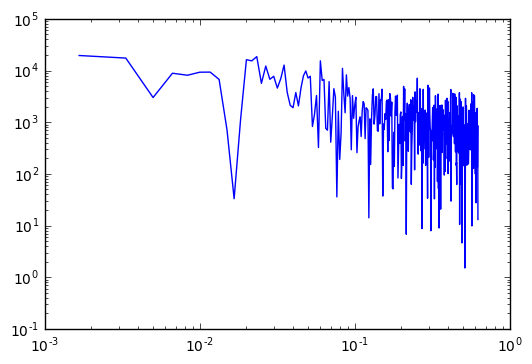

In [9]:
freq=np.fft.rfftfreq(len(time_series),0.802)
ts_fft=np.fft.rfft(time_series)
ts_ps=abs(ts_fft)**2
plt.loglog(freq,ts_ps)

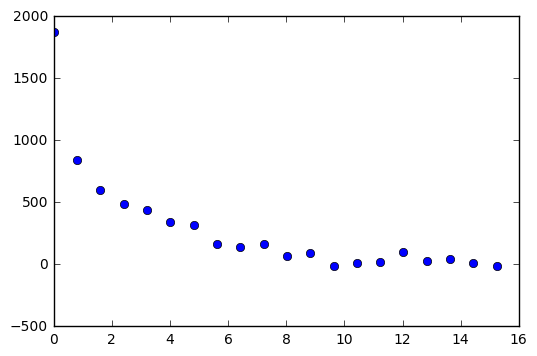

In [10]:
ts_ac=np.fft.irfft(ts_ps)
time_ac=np.arange(len(ts_ac))*0.802
plt.plot(time_ac[:20],ts_ac[:20],"o")

In [11]:
import lmfit as lm
mod=lm.models.ExponentialModel()
pars = mod.guess(ts_ac[1:20], x=time_ac[1:20])
out  = mod.fit(ts_ac[1:20], pars, x=time_ac[1:20])
print(out.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 12
    # data points      = 19
    # variables        = 2
    chi-square         = 26413.721
    reduced chi-square = 1553.748
    Akaike info crit   = 143.620
    Bayesian info crit = 145.509
[[Variables]]
    amplitude:   1036.69280 +/- 49.23402 (4.75%) (init= 956.8742)
    decay:       3.42563035 +/- 0.204283 (5.96%) (init= 3.357516)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.786 



In [12]:
from scipy.signal import butter, lfilter,filtfilt


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [13]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 1/0.802
lowcut = 0.01
highcut = 0.1


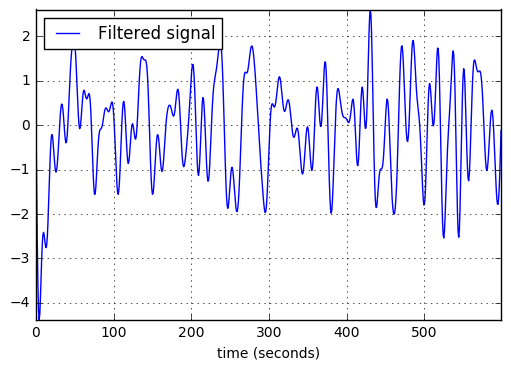

In [14]:
filtered_ts = butter_bandpass_filter(time_series, lowcut, highcut, fs, order=5)
plt.plot(time_ts, filtered_ts, label='Filtered signal')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')


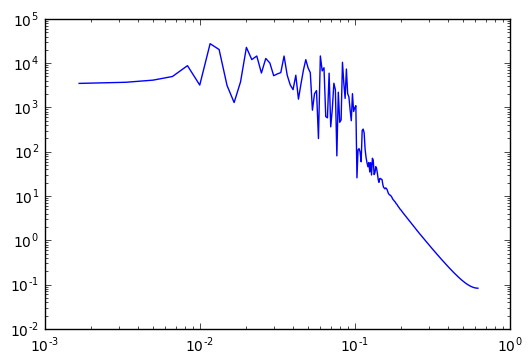

In [15]:
tsf_fft=np.fft.rfft(filtered_ts)
tsf_ps=abs(tsf_fft)**2
plt.loglog(freq,tsf_ps)

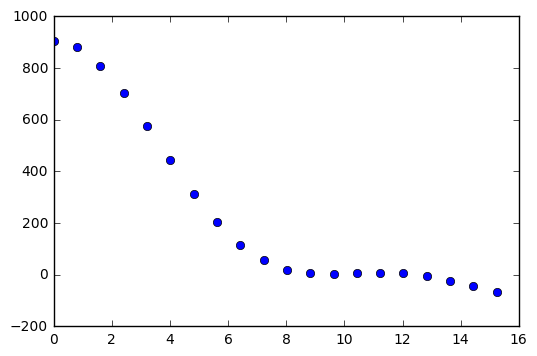

In [16]:
tsf_ac=np.fft.irfft(tsf_ps)
plt.plot(time_ac[:20],tsf_ac[:20],"o")

In [17]:
pars = mod.guess(tsf_ac[1:20], x=time_ac[1:20])
out  = mod.fit(tsf_ac[1:20], pars, x=time_ac[1:20])
print(out.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 19
    # variables        = 2
    chi-square         = 85104.607
    reduced chi-square = 5006.153
    Akaike info crit   = 165.850
    Bayesian info crit = 167.739
[[Variables]]
    amplitude:   1289.63734 +/- 93.52368 (7.25%) (init= 854.0609)
    decay:       3.18102452 +/- 0.286621 (9.01%) (init= 2.935786)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.790 

